# IPL Score Prediction using Deep Learning 

Since the dawn of the IPL in 2008, it has attracted viewers all around the globe. A high level of uncertainty and last moment nail biters has urged fans to watch the matches. Within a short period, IPL has become the highest revenue-generating league of cricket. In a cricket match, we often see the scoreline showing the probability of the team winning based on the current match situation. This prediction is usually done with the help of Data Analytics. Before when there were no advancements in machine learning, the prediction was usually based on intuitions or some basic algorithms. The above picture clearly tells you how bad is taking run rate as a single factor to predict the final score in a limited-overs cricket match. 

Being a cricket fan, visualizing the statistics of cricket is mesmerizing. We went through various blogs and found out patterns that could be used for predicting the score of IPL matches beforehand. 

# Tools used:
Jupyter Notebook / Google colab
Visual Studio
# Technology used:
Machine Learning.
Deep Learning
Flask (Front-end integration).
Well, for the smooth running of the project we’ve used few libraries like NumPy, Pandas, Scikit-learn, TensorFlow, and Matplotlib.

First, let’s import all the necessary libraries:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Step 2: Data cleaning and formatting

We imported both the datasets using .read_csv() method into a dataframe 
using pandas and displayed the first 5 rows of each dataset. We did some 
changes to our dataset like added a new column named “y” which had the runs
scored in the first 6 overs from that particular inning.  

In [6]:
ipl = pd.read_csv('0y clean data pre ipl.csv')
ipl.head()

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0


In [7]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')
data.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


Now, we will merge both datasets.

In [8]:
ipl= ipl.drop(['Unnamed: 0','extras','match_id', 'runs_off_bat'],axis = 1)
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player',how='left')
new_ipl.drop(['wicket_type', 'player_dismissed'],axis=1,inplace=True)
new_ipl.columns


Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'run', 'wickets', 'truns', 'y', 'Team',
       'Player', 'Tournament', 'Matches', 'Batting Innings', 'Not Out',
       'Runds Scored', 'Highest Score', 'Batting Average', 'Balls Faced',
       'Batting Strike Rate', '100', '50', '0', '4s', '6s', 'Bowling Innings',
       'Overs Bowled', 'Maidens Bowled', 'Runs Conceded', 'Wickets Taken',
       'Best Bowling Figures', 'Bowling Average', 'Bowling Economy Rate',
       'Bowling Strike Rate', '4+ Innings Wickets', '5+ Innings Wickets',
       'Catches Taken', 'Stumpings Made'],
      dtype='object')

After merging the columns and removing new unwanted columns, we have the following columns left. Here’s the modified dataset.

There are various ways to fill null values in our dataset. Here I am simply replacing the categorical values which are nan with ‘.’

In [11]:
str_cols = new_ipl.columns[new_ipl.dtypes==object]
new_ipl[str_cols] = new_ipl[str_cols].fillna('.')


Step 3: Encoding the categorical data to numerical values.

For the columns to be able to assist the model in the prediction, the values should make some sense to the computers. Since they (still) don’t have the ability to understand and draw inferences from the text, we need to encode the strings to numeric categorical values. While we may choose to do the process manually, the Scikit-learn library gives us an option to use LabelEncoder.

In [18]:
listf = []
  
for c in new_ipl.columns:
    if new_ipl.all==object:
        print(c,"->" ,new_ipl.dtype)
        listf.append(c)

In [19]:
a1 = new_ipl['venue'].unique()
a2 = new_ipl['batting_team'].unique()
a3 = new_ipl['bowling_team'].unique()
a4 = new_ipl['striker'].unique()
a5 = new_ipl['bowler'].unique()
  
def labelEncoding(data):
    dataset = pd.DataFrame(new_ipl)
    feature_dict ={}
      
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
              
    return dataset
  
labelEncoding(new_ipl)

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,run,wickets,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.1,7,13,186,30,201,1.0,0.0,...,1,1,1,1,1,1,1,1,NaN,NaN
1,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
2,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,15,1,0.2,7,13,30,184,201,0.0,0.0,...,0,0,0,0,0,0,0,0,8.0,0.0
4,15,1,0.3,7,13,30,184,201,1.0,0.0,...,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85186,31,1,6.5,14,10,127,47,220,1.0,1.0,...,0,0,0,0,0,0,0,0,9.0,0.0
85187,31,1,6.5,14,10,127,47,220,1.0,1.0,...,0,0,0,0,0,0,0,0,7.0,0.0
85188,31,1,6.6,14,10,48,126,220,1.0,1.0,...,0,0,0,0,0,0,0,0,4.0,0.0
85189,31,1,6.6,14,10,48,126,220,1.0,1.0,...,0,0,0,0,0,0,0,0,10.0,0.0


In [20]:
ip_dataset = new_ipl[['venue','innings', 'batting_team', 
                      'bowling_team', 'striker', 'non_striker',
                      'bowler']]
  
b1 = ip_dataset['venue'].unique()
b2 = ip_dataset['batting_team'].unique()
b3 = ip_dataset['bowling_team'].unique()
b4 = ip_dataset['striker'].unique()
b5 = ip_dataset['bowler'].unique()
new_ipl.fillna(0,inplace=True)
  
features={}
  
for i in range(len(a1)):
    features[a1[i]]=b1[i]
for i in range(len(a2)):
    features[a2[i]]=b2[i]
for i in range(len(a3)):
    features[a3[i]]=b3[i]
for i in range(len(a4)):
    features[a4[i]]=b4[i]
for i in range(len(a5)):
    features[a5[i]]=b5[i]
      
features

{'M Chinnaswamy Stadium': 15,
 'Punjab Cricket Association Stadium, Mohali': 26,
 'Feroz Shah Kotla': 9,
 'Eden Gardens': 8,
 'Wankhede Stadium': 39,
 'Sawai Mansingh Stadium': 31,
 'Rajiv Gandhi International Stadium, Uppal': 28,
 'MA Chidambaram Stadium, Chepauk': 18,
 'Dr DY Patil Sports Academy': 5,
 'Newlands': 22,
 "St George's Park": 35,
 'Kingsmead': 14,
 'SuperSport Park': 37,
 'Buffalo Park': 3,
 'New Wanderers Stadium': 21,
 'De Beers Diamond Oval': 4,
 'OUTsurance Oval': 23,
 'Brabourne Stadium': 2,
 'Sardar Patel Stadium, Motera': 29,
 'Barabati Stadium': 1,
 'Vidarbha Cricket Association Stadium, Jamtha': 38,
 'Himachal Pradesh Cricket Association Stadium': 11,
 'Nehru Stadium': 20,
 'Holkar Cricket Stadium': 12,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 6,
 'Subrata Roy Sahara Stadium': 36,
 'Shaheed Veer Narayan Singh International Stadium': 32,
 'JSCA International Stadium Complex': 13,
 'Sheikh Zayed Stadium': 34,
 'Sharjah Cricket Stadium': 33,
 'Dubai 

Step 4: Feature Engineering and Selection

Our dataset contains multiple columns, but we can’t take these many inputs from users thus we have taken the selected amount of features as input and divided them into X and y. We will then divide our data into train sets and test set before using a machine learning algorithm.

In [21]:
X = new_ipl[['venue', 'innings','batting_team',
             'bowling_team', 'striker','bowler']].values
y = new_ipl['y'].values
  
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.33, random_state=42)

Comparing these large numerical values by our model will be difficult so it is always a better choice to scale your data before processing it. Here we are using MinMaxScaler from sklearn.preprocessing which is recommended when dealing with deep learning.

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
  
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Note: We cannot fit X_test as it is the data which is to be predicted. 

Step 5: Building, Training & Testing the Model

Here comes the most exciting part of our project, Building our model! Firstly, we will import Sequential from tensorflow.keras.models Also, we will import Dense & Dropout from tensorflow.keras.layers as we will be using multiple layers.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

EarlyStopping is used to avoid overfitting. What early stopping basically does is, it stops calculating the losses when ‘val_loss’ increases than ‘loss’. Val_loss curve should always be below val curve. When it is found that the difference between ‘val_loss’ and ‘loss’ is becomes constant, it stops training.

In [24]:
model = Sequential()
  
model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))
  
model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))
  
model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))
  
model.add(Dense(1))
  
model.compile(optimizer='adam', loss='mse')

Here, we have created 2 hidden layers and reduced the number of neurons as we want the final output to be 1. Then while compiling our model we used adam optimizer and loss as mean squared error.  Now, let’s start training our model with epochs=400.

In [28]:
model.fit(x=X_train, y=y_train, epochs=400, 
          validation_data=(X_test,y_test),
          callbacks=[] )

Epoch 1/400
1784/1784 [==============================] - 12s 5ms/step - loss: 974.5809 - val_loss: 299.7319
Epoch 2/400
1784/1784 [==============================] - 11s 6ms/step - loss: 680.9727 - val_loss: 273.6363
Epoch 3/400
1784/1784 [==============================] - 8s 5ms/step - loss: 614.5026 - val_loss: 226.7275
Epoch 4/400
1784/1784 [==============================] - 12s 7ms/step - loss: 558.8760 - val_loss: 233.7936
Epoch 5/400
1784/1784 [==============================] - 9s 5ms/step - loss: 519.7264 - val_loss: 208.3313
Epoch 6/400
1784/1784 [==============================] - 9s 5ms/step - loss: 491.7924 - val_loss: 216.7101
Epoch 7/400
1784/1784 [==============================] - 10s 6ms/step - loss: 450.8994 - val_loss: 203.9463
Epoch 8/400
1784/1784 [==============================] - 12s 7ms/step - loss: 402.6416 - val_loss: 185.5817
Epoch 9/400
1784/1784 [==============================] - 10s 5ms/step - loss: 371.3091 - val_loss: 191.0267
Epoch 10/400
1784/1784 [=======

1784/1784 [==============================] - 11s 6ms/step - loss: 144.2089 - val_loss: 140.7892
Epoch 77/400
1784/1784 [==============================] - 12s 7ms/step - loss: 144.1145 - val_loss: 141.0306
Epoch 78/400
1784/1784 [==============================] - 8s 4ms/step - loss: 144.2416 - val_loss: 141.0420
Epoch 79/400
1784/1784 [==============================] - 9s 5ms/step - loss: 144.1839 - val_loss: 141.7402
Epoch 80/400
1784/1784 [==============================] - 10s 6ms/step - loss: 144.4023 - val_loss: 141.2004
Epoch 81/400
1784/1784 [==============================] - 11s 6ms/step - loss: 144.0712 - val_loss: 140.3567
Epoch 82/400
1784/1784 [==============================] - 13s 7ms/step - loss: 143.9855 - val_loss: 141.5555
Epoch 83/400
1784/1784 [==============================] - 13s 7ms/step - loss: 144.2154 - val_loss: 140.7216
Epoch 84/400
1784/1784 [==============================] - 13s 8ms/step - loss: 144.1738 - val_loss: 141.0098
Epoch 85/400
1784/1784 [==========

Epoch 151/400
1784/1784 [==============================] - 9s 5ms/step - loss: 142.4400 - val_loss: 138.4625
Epoch 152/400
1784/1784 [==============================] - 8s 4ms/step - loss: 141.8971 - val_loss: 137.6559
Epoch 153/400
1784/1784 [==============================] - 8s 5ms/step - loss: 141.8602 - val_loss: 137.4227
Epoch 154/400
1784/1784 [==============================] - 8s 5ms/step - loss: 142.1317 - val_loss: 137.6000
Epoch 155/400
1784/1784 [==============================] - 9s 5ms/step - loss: 142.2525 - val_loss: 138.5056
Epoch 156/400
1784/1784 [==============================] - 10s 5ms/step - loss: 142.1892 - val_loss: 137.3258
Epoch 157/400
1784/1784 [==============================] - 11s 6ms/step - loss: 141.8702 - val_loss: 136.8313
Epoch 158/400
1784/1784 [==============================] - 9s 5ms/step - loss: 142.0097 - val_loss: 137.0553
Epoch 159/400
1784/1784 [==============================] - 10s 5ms/step - loss: 142.3392 - val_loss: 138.6422
Epoch 160/400
17

1784/1784 [==============================] - 6s 3ms/step - loss: 142.7654 - val_loss: 137.6112
Epoch 227/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.0982 - val_loss: 137.5118
Epoch 228/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.5999 - val_loss: 137.4443
Epoch 229/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.2817 - val_loss: 137.9437
Epoch 230/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.1246 - val_loss: 137.7442
Epoch 231/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.1683 - val_loss: 137.7482
Epoch 232/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.1480 - val_loss: 138.3247
Epoch 233/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.4449 - val_loss: 137.6619
Epoch 234/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.1579 - val_loss: 138.5413
Epoch 235/400
1784/1784 [========

1784/1784 [==============================] - 6s 3ms/step - loss: 142.1907 - val_loss: 136.4336
Epoch 302/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.2934 - val_loss: 137.2385
Epoch 303/400
1784/1784 [==============================] - 5s 3ms/step - loss: 141.8815 - val_loss: 136.4146
Epoch 304/400
1784/1784 [==============================] - 6s 3ms/step - loss: 141.7658 - val_loss: 136.7381
Epoch 305/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.2315 - val_loss: 137.1625
Epoch 306/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.1118 - val_loss: 137.9658
Epoch 307/400
1784/1784 [==============================] - 6s 3ms/step - loss: 141.7647 - val_loss: 136.5441
Epoch 308/400
1784/1784 [==============================] - 6s 3ms/step - loss: 141.7903 - val_loss: 137.1026
Epoch 309/400
1784/1784 [==============================] - 6s 3ms/step - loss: 141.9613 - val_loss: 137.1444
Epoch 310/400
1784/1784 [========

1784/1784 [==============================] - 5s 3ms/step - loss: 142.0631 - val_loss: 137.2971
Epoch 377/400
1784/1784 [==============================] - 5s 3ms/step - loss: 141.8393 - val_loss: 137.1500
Epoch 378/400
1784/1784 [==============================] - 5s 3ms/step - loss: 141.7450 - val_loss: 136.3802
Epoch 379/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.2006 - val_loss: 138.0026
Epoch 380/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.1371 - val_loss: 137.8853
Epoch 381/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.2548 - val_loss: 137.2396
Epoch 382/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.4966 - val_loss: 138.4038
Epoch 383/400
1784/1784 [==============================] - 6s 3ms/step - loss: 142.4965 - val_loss: 136.8809
Epoch 384/400
1784/1784 [==============================] - 5s 3ms/step - loss: 142.0931 - val_loss: 137.0169
Epoch 385/400
1784/1784 [========

It will take some time because of a huge number of samples and epochs and will output the ‘loss’ and ‘val_loss’ of each sample as below.
After the training is complete, let us visualize our model’s losses.

<AxesSubplot:>

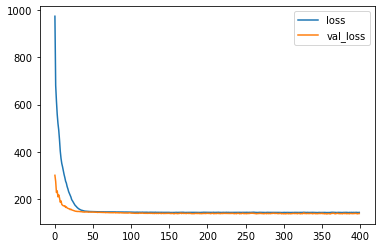

In [29]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

As we can see our model is having absolutely perfect behavior!  

Step 6: Predictions!

Here we come to the final part of our project where we will be predicting our X_test. Then we will create a dataframe that would show us the actual values and the predicted values.

In [31]:
predictions = model.predict(X_test)
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test
sample.head(10)

879/879 [==============================] - 1s 1ms/step


,Predict,Actual
0,50.969944,47.0
1,56.677502,53.0
2,50.969944,56.0
3,51.921875,52.0
4,48.281471,20.0
5,55.233898,47.0
6,49.118122,26.0
7,51.765152,43.0
8,52.213978,55.0
9,48.790630,48.0


As we can see, our model is predicting quite well. It is giving us almost similar scores. To find out more accurately the difference between actual and predicted scores, performance metrics will show us the error rate using mean_absolute_error and mean_squared_error from sklearn.metrics 

# Performance Metrics! 

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mean_absolute_error(y_test,predictions)

9.23479377896923

In [33]:
np.sqrt(mean_squared_error(y_test,predictions))

11.727558088415382